<a href="https://colab.research.google.com/github/ttlttk8161/-PBL-Reinforcement-learning/blob/main/4_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQN(Deep Q-Network) 소개

## 1. DQN이란 무엇인가?

DQN(Deep Q-Network)은 딥러닝을 활용한 강화학습(Deep Reinforcement Learning) 알고리즘입니다. Q-Learning의 한계를 극복하기 위해 딥러닝(특히 CNN)을 결합하여, 복잡한 환경에서도 에이전트가 최적의 행동을 학습할 수 있도록 고안되었습니다. 2015년 DeepMind가 Atari 게임에서 인간 수준의 성능을 보이며 큰 주목을 받았습니다.

여기서 Q는 'Q-value' 또는 '행동 가치 함수'를 의미합니다. Q(s, a)는 어떤 상태(state) s에서 특정 행동(action) a를 선택했을 때 앞으로 받을 것으로 기대되는 총 보상의 크기를 나타냅니다. 즉, Q값이 높을수록 해당 상태에서 그 행동을 했을 때 더 많은 보상을 받을 것으로 기대할 수 있습니다.

---

## 2. DQN의 기본 개념

- **강화학습(정의):** 에이전트가 환경과 상호작용하며 보상을 최대화하는 행동을 학습하는 방법
- **Q-Learning:** 상태(state)와 행동(action) 쌍에 대해 Q-value(미래 보상의 기대값)를 업데이트하며 최적 정책을 찾는 오프라인 강화학습 알고리즘
- **딥러닝의 도입:** 기존 Q-테이블 대신 신경망(Deep Neural Network)을 사용하여 Q-value를 근사

---

## 3. DQN의 주요 구성 요소

1. **Q-Network:** 상태를 입력받아 각 행동의 Q-value를 출력하는 신경망
2. **Target Network:** 일정 주기마다 Q-Network의 가중치를 복사하여 안정적인 학습을 돕는 별도의 신경망
3. **Experience Replay:** 에이전트의 경험(transition)을 메모리에 저장하고, 무작위로 샘플링하여 학습에 사용함으로써 데이터의 상관관계를 줄이고 효율적인 학습을 가능하게 함

---

## 4. DQN의 학습 과정

1. 환경에서 상태(state)를 관찰
2. Q-Network를 통해 행동(action) 선택(탐험/탐사: ε-greedy)
3. 선택한 행동을 환경에 적용, 보상(reward)과 다음 상태(next state) 관찰
4. 경험(transition)을 리플레이 메모리에 저장
5. 미니배치로 샘플링하여 Q-Network 학습
6. 일정 주기마다 Target Network 업데이트

---

## 5. DQN의 핵심 수식

- **Q-러닝 업데이트 식:**

  > **요약:**  
  > Q-러닝 업데이트 식은 현재 Q값을 실제 보상과 예측된 미래 가치의 차이만큼 조금씩 보정해 나가는 방식입니다. 즉, 경험을 통해 Q값을 점진적으로 더 정확하게 만듭니다.

  $$
  Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
  $$
  - $Q(s, a)$: 현재 상태 $s$에서 행동 $a$를 선택했을 때의 Q-value(가치)
  - $\alpha$: 학습률(learning rate), Q-value를 얼마나 빠르게 업데이트할지 결정
  - $r$: 현재 단계에서 받은 보상(reward)
  - $\gamma$: 할인율(discount factor), 미래 보상의 현재 가치에 대한 가중치
  - $s'$: 다음 상태(next state)
  - $a'$: 다음 상태에서 선택 가능한 모든 행동
  - $\max_{a'} Q(s', a')$: 다음 상태 $s'$에서 선택할 수 있는 행동 중 가장 큰 Q-value

- **DQN 손실 함수:**
  $$
  L(\theta) = \mathbb{E}_{(s, a, r, s') \sim D} \left[ (r + \gamma \max_{a'} Q_{\theta^-}(s', a') - Q_\theta(s, a))^2 \right]
  $$
  - $L(\theta)$: Q-Network의 파라미터 $\theta$에 대한 손실(loss) 함수
  - $(s, a, r, s') \sim D$: 리플레이 메모리 $D$에서 샘플링한 경험(transition)
  - $Q_\theta(s, a)$: 현재 Q-Network(파라미터 $\theta$)가 예측한 Q-value
  - $Q_{\theta^-}(s', a')$: 타깃 네트워크(파라미터 $\theta^-$)가 예측한 다음 상태 $s'$에서의 Q-value
  - $r + \gamma \max_{a'} Q_{\theta^-}(s', a')$: 타깃 값(target value), 실제 보상과 미래 Q-value의 합
  - $\theta$: Q-Network의 파라미터(학습 대상)
  - $\theta^-$: 일정 주기마다 Q-Network의 파라미터를 복사해 사용하는 Target Network의 파라미터(고정된 값)

---

## 6. DQN의 한계와 개선

- **한계:** 과적합, 불안정한 학습, 과도한 Q-value 추정 등
- **개선 방법:** Double DQN, Dueling DQN, Prioritized Experience Replay 등

---

## 7. 실습 예시

- OpenAI Gym의 CartPole 환경에서 DQN을 구현해보기
- 주요 하이퍼파라미터(learning rate, epsilon, batch size 등) 실험

---

## 8. 정리

- DQN은 Q-Learning과 딥러닝을 결합하여 복잡한 환경에서도 강화학습이 가능하도록 한 대표적인 알고리즘
- Target Network, Experience Replay 등 안정적인 학습을 위한 다양한 기법이 도입됨
- 실제 구현 및 실험을 통해 DQN의 동작 원리와 한계를 직접 체험해볼 수 있음

---

## 9. 참고 자료

- [DeepMind DQN 논문(2015)](https://www.nature.com/articles/nature14236)
- Sutton & Barto, "Reinforcement Learning: An Introduction"
- OpenAI Gym 공식 문서


---

In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np
np.__version__

'1.26.4'

In [ ]:
!pip install -U gym -q

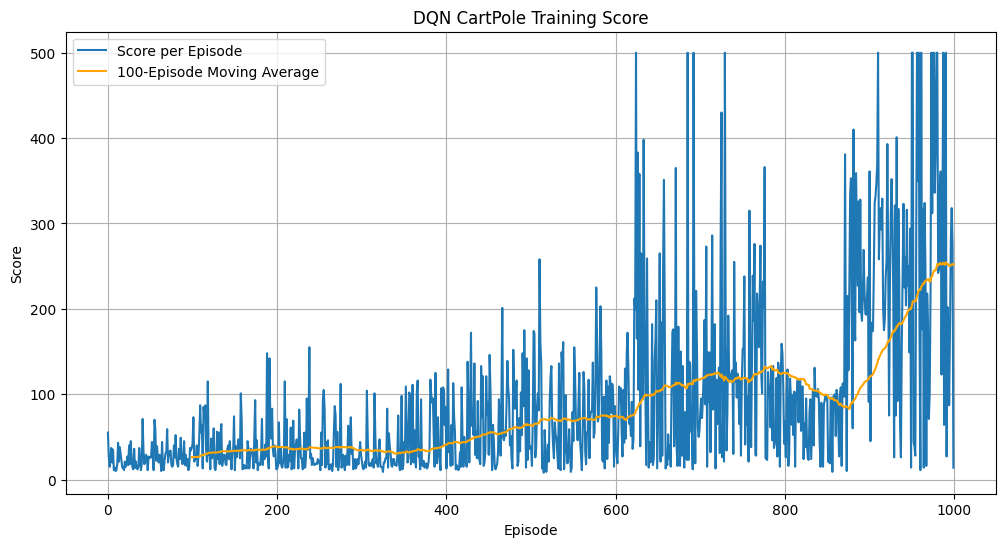

In [ ]:
import random
import numpy as np
import gym
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from IPython.display import clear_output

# GPU 사용 가능 시 메모리 증가 허용 (속도 및 안정성)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except:
        pass

class QNetwork(tf.keras.Model):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.hidden1 = tf.keras.layers.Dense(64, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim)

    def call(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        return self.output_layer(x)

class DQNAgent:
    def __init__(
        self,
        env_name='CartPole-v1',
        learning_rate=0.001,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=500,
        target_update_freq=10,
        batch_size=64,
        memory_size=10000,
        num_episodes=1000
    ):
        self.env = gym.make(env_name)
        self.state_dim = self.env.observation_space.shape[0]
        self.action_dim = self.env.action_space.n

        # 메인 Q-네트워크: 실시간으로 학습되는 네트워크
        self.q_net = QNetwork(self.state_dim, self.action_dim)
        # 타겟 Q-네트워크: 안정적인 학습을 위해 주기적으로만 업데이트되는 네트워크
        # DQN의 핵심 아이디어 - 타겟값 계산에 사용하여 학습의 안정성을 높임
        self.target_net = QNetwork(self.state_dim, self.action_dim)
        self.target_net.set_weights(self.q_net.get_weights())

        # tf.function으로 train_step 최적화
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.loss_fn = tf.keras.losses.MeanSquaredError()

        self.gamma = gamma
        self.epsilon_start = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.target_update_freq = target_update_freq
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.num_episodes = num_episodes

        self.scores = []

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return self.env.action_space.sample()
        state = np.expand_dims(state, axis=0).astype(np.float32)
        # tf.function으로 속도 향상
        q_values = self.q_net(state, training=False)
        return int(tf.argmax(q_values[0]).numpy())

    # @tf.function 데코레이터: 함수를 TensorFlow 그래프로 컴파일하여 실행 속도를 크게 향상시킵니다.
    # 특히 반복적으로 호출되는 학습 함수에서 성능 개선 효과가 큽니다.
    @tf.function
    def train_step(self, states, actions, rewards, next_states, dones):
        # 벡터화된 연산으로 속도 향상
        next_q = self.target_net(next_states, training=False)
        max_next_q = tf.reduce_max(next_q, axis=1)
        targets = rewards + self.gamma * max_next_q * (1.0 - dones)

        # 손실 함수의 gradient를 계산하기 위해 tf.GradientTape()를 사용합니다.
        with tf.GradientTape() as tape:
            q_values = self.q_net(states, training=True)
            # gather로 벡터화
            indices = tf.stack([tf.range(tf.shape(actions)[0]), actions], axis=1)
            pred_q = tf.gather_nd(q_values, indices)
            loss = self.loss_fn(targets, pred_q)
        grads = tape.gradient(loss, self.q_net.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.q_net.trainable_variables))
        return loss

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = np.array(states, dtype=np.float32)
        actions = np.array(actions, dtype=np.int32)
        rewards = np.array(rewards, dtype=np.float32)
        next_states = np.array(next_states, dtype=np.float32)
        dones = np.array(dones, dtype=np.float32)
        # train_step을 통해 속도 최적화
        self.train_step(states, actions, rewards, next_states, dones)

    def process_env_reset(self):
        reset_result = self.env.reset()
        if isinstance(reset_result, tuple):
            return reset_result[0]
        return reset_result

    def process_env_step(self, step_result):
        if len(step_result) == 5:
            next_state, reward, terminated, truncated, _ = step_result
            done = terminated or truncated
        else:
            next_state, reward, done, _ = step_result
        return next_state, reward, done

    def run(self):
        epsilon = self.epsilon_start
        for episode in range(self.num_episodes):
            state = self.process_env_reset()
            done = False
            score = 0
            while not done:
                epsilon = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * np.exp(-1. * episode / self.epsilon_decay)
                action = self.select_action(state, epsilon)
                step_result = self.env.step(action)
                next_state, reward, done = self.process_env_step(step_result)
                self.memory.append((state, action, reward, next_state, float(done)))
                state = next_state
                score += reward
                self.train()
            self.scores.append(score)
            if episode % self.target_update_freq == 0:
                self.target_net.set_weights(self.q_net.get_weights())
            if (episode + 1) % 20 == 0:
                print(f"Episode {episode+1}, Average Score: {np.mean(self.scores[-20:]):.2f}, epsilon: {epsilon:.3f}")
                clear_output(wait=True)
                plt.figure(figsize=(12,6))
                plt.plot(self.scores, label='Score per Episode')
                if len(self.scores) >= 100:
                    moving_avg = np.convolve(self.scores, np.ones(100)/100, mode='valid')
                    plt.plot(range(99, len(self.scores)), moving_avg, label='100-Episode Moving Average', color='orange')
                plt.xlabel('Episode')
                plt.ylabel('Score')
                plt.title('DQN CartPole Training Score')
                plt.legend()
                plt.grid()
                plt.show()
        self.env.close()

agent = DQNAgent()
agent.run()


In [ ]:
import random
import numpy as np
import gym
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from IPython.display import clear_output

# GPU 사용 가능 시 메모리 증가 허용 (속도 및 안정성)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except:
        pass

class QNetwork(tf.keras.Model):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.hidden1 = tf.keras.layers.Dense(64, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim)

    def call(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        return self.output_layer(x)

class DQNAgent:
    def __init__(
        self,
        env_name='CartPole-v1',
        learning_rate=0.001,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=500,
        target_update_freq=10,
        batch_size=64,
        memory_size=10000,
        num_episodes=1000
    ):
        self.env = gym.make(env_name)
        self.state_dim = self.env.observation_space.shape[0]
        self.action_dim = self.env.action_space.n

        self.q_net = QNetwork(self.state_dim, self.action_dim)
        self.target_net = QNetwork(self.state_dim, self.action_dim)
        self.target_net.set_weights(self.q_net.get_weights())

        # tf.function으로 train_step 최적화
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.loss_fn = tf.keras.losses.MeanSquaredError()

        self.gamma = gamma
        self.epsilon_start = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.target_update_freq = target_update_freq
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.num_episodes = num_episodes

        self.scores = []

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return self.env.action_space.sample()
        state = np.expand_dims(state, axis=0).astype(np.float32)
        # tf.function으로 속도 향상
        q_values = self.q_net(state, training=False)
        return int(tf.argmax(q_values[0]).numpy())

    @tf.function
    def train_step(self, states, actions, rewards, next_states, dones):
        # 벡터화된 연산으로 속도 향상
        next_q = self.target_net(next_states, training=False)
        max_next_q = tf.reduce_max(next_q, axis=1)
        targets = rewards + self.gamma * max_next_q * (1.0 - dones)

        # 손실 함수의 gradient를 계산하기 위해 tf.GradientTape()를 사용합니다.
        with tf.GradientTape() as tape:
            q_values = self.q_net(states, training=True)
            # gather로 벡터화
            indices = tf.stack([tf.range(tf.shape(actions)[0]), actions], axis=1)
            pred_q = tf.gather_nd(q_values, indices)
            loss = self.loss_fn(targets, pred_q)
        grads = tape.gradient(loss, self.q_net.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.q_net.trainable_variables))
        return loss

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = np.array(states, dtype=np.float32)
        actions = np.array(actions, dtype=np.int32)
        rewards = np.array(rewards, dtype=np.float32)
        next_states = np.array(next_states, dtype=np.float32)
        dones = np.array(dones, dtype=np.float32)
        # train_step을 통해 속도 최적화
        self.train_step(states, actions, rewards, next_states, dones)

    def process_env_reset(self):
        reset_result = self.env.reset()
        if isinstance(reset_result, tuple):
            return reset_result[0]
        return reset_result

    def process_env_step(self, step_result):
        if len(step_result) == 5:
            next_state, reward, terminated, truncated, _ = step_result
            done = terminated or truncated
        else:
            next_state, reward, done, _ = step_result
        return next_state, reward, done

    def run(self):
        epsilon = self.epsilon_start
        for episode in range(self.num_episodes):
            state = self.process_env_reset()
            done = False
            score = 0
            while not done:
                epsilon = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * np.exp(-1. * episode / self.epsilon_decay)
                action = self.select_action(state, epsilon)
                step_result = self.env.step(action)
                next_state, reward, done = self.process_env_step(step_result)
                self.memory.append((state, action, reward, next_state, float(done)))
                state = next_state
                score += reward
                self.train()
            self.scores.append(score)
            if episode % self.target_update_freq == 0:
                self.target_net.set_weights(self.q_net.get_weights())
            if (episode + 1) % 20 == 0:
                print(f"Episode {episode+1}, Average Score: {np.mean(self.scores[-20:]):.2f}, epsilon: {epsilon:.3f}")
                clear_output(wait=True)
                plt.figure(figsize=(12,6))
                plt.plot(self.scores, label='Score per Episode')
                if len(self.scores) >= 100:
                    moving_avg = np.convolve(self.scores, np.ones(100)/100, mode='valid')
                    plt.plot(range(99, len(self.scores)), moving_avg, label='100-Episode Moving Average', color='orange')
                plt.xlabel('Episode')
                plt.ylabel('Score')
                plt.title('DQN CartPole Training Score')
                plt.legend()
                plt.grid()
                plt.show()
        self.env.close()

agent = DQNAgent()
agent.run()


In [ ]:
import gym
import numpy as np

# Patch the passive env checker to remove the np.bool8 check
# This is a workaround for compatibility issues with newer numpy versions
# where np.bool8 has been removed.
try:
    from gym.utils.passive_env_checker import env_step_passive_checker
    from gym.utils.passive_env_checker import logger
    import warnings

    def patched_env_step_passive_checker(env, action):
        # Original checks for observation, reward, info...
        # ... (keep original checks if needed, or simplify)

        # --- Start of the problematic check in the original function ---
        # This check is causing the AttributeError with newer numpy
        # if not isinstance(terminated, (bool, np.bool8)):
        #     logger.warn(...)
        # --- End of the problematic check ---

        # Call the original step method
        step_returns = env.step(action)

        # Assuming new API (observation, reward, terminated, truncated, info)
        if len(step_returns) == 5:
            observation, reward, terminated, truncated, info = step_returns
            done = terminated or truncated
        # Assuming old API (observation, reward, done, info)
        elif len(step_returns) == 4:
             observation, reward, done, info = step_returns
             terminated = done # Simulate terminated for compatibility if needed
             truncated = False # Simulate truncated
        else:
             raise ValueError(f"Expected step to return 4 or 5 values, got {len(step_returns)}")


        # You might want to add checks for the *types* of terminated and truncated here
        # without relying on np.bool8, e.g., isinstance(terminated, bool)
        # or just trust the environment to return correct types in new API mode.

        # Return values in the new API format (observation, reward, terminated, truncated, info)
        return observation, reward, terminated, truncated, info


    # Replace the original function with the patched version
    gym.utils.passive_env_checker.env_step_passive_checker = patched_env_step_passive_checker
    print("Patched gym.utils.passive_env_checker.env_step_passive_checker successfully.")

except Exception as e:
    print(f"Could not patch gym.utils.passive_env_checker: {e}")
    print("Attempting to proceed without patching. This might cause issues.")

Patched gym.utils.passive_env_checker.env_step_passive_checker successfully.


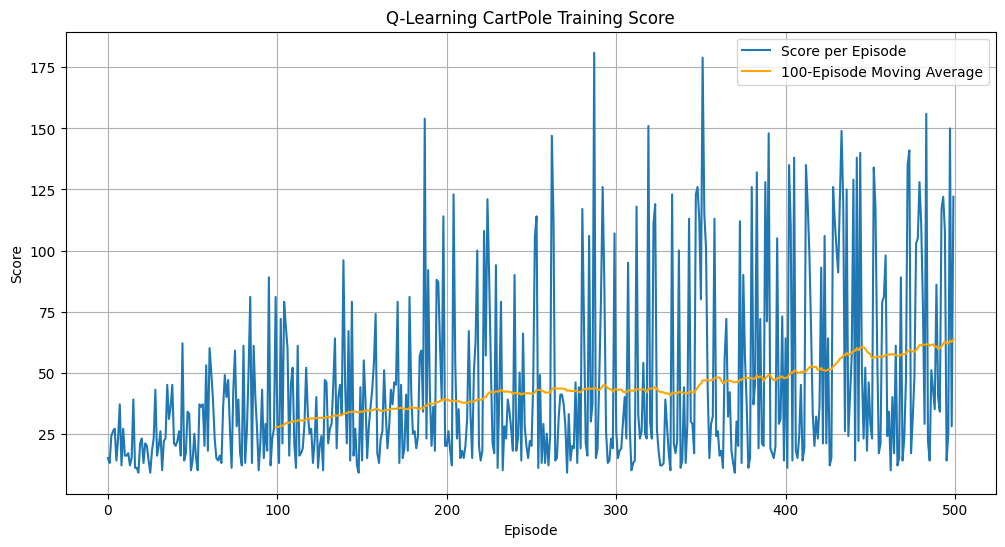

In [ ]:
import random
import numpy as np
import gym
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
from IPython.display import clear_output

# GPU 사용 가능 시 메모리 증가 허용 (속도 및 안정성)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except:
        pass

class QNetwork(tf.keras.Model):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.hidden1 = tf.keras.layers.Dense(64, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim)

    def call(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        return self.output_layer(x)

class QNBase:
    """Q-러닝 기반 알고리즘의 기본 클래스"""
    def __init__(
        self,
        env_name='CartPole-v1',
        learning_rate=0.001,
        gamma=0.99,
        epsilon_start=1.0,
        epsilon_end=0.01,
        epsilon_decay=500,
        target_update_freq=10,
        batch_size=64,
        memory_size=10000,
        num_episodes=1000
    ):
        self.env = gym.make(env_name)
        self.state_dim = self.env.observation_space.shape[0]
        self.action_dim = self.env.action_space.n

        # 메인 Q-네트워크: 실시간으로 학습되는 네트워크
        self.q_net = QNetwork(self.state_dim, self.action_dim)
        # 타겟 Q-네트워크: 안정적인 학습을 위해 주기적으로만 업데이트되는 네트워크
        # DQN의 핵심 아이디어 - 타겟값 계산에 사용하여 학습의 안정성을 높임
        self.target_net = QNetwork(self.state_dim, self.action_dim)
        self.target_net.set_weights(self.q_net.get_weights())

        # tf.function으로 train_step 최적화
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.loss_fn = tf.keras.losses.MeanSquaredError()

        self.gamma = gamma
        self.epsilon_start = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.target_update_freq = target_update_freq
        self.batch_size = batch_size
        self.memory = deque(maxlen=memory_size)
        self.num_episodes = num_episodes

        self.scores = []

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return self.env.action_space.sample()
        state = np.expand_dims(state, axis=0).astype(np.float32)
        # tf.function으로 속도 향상
        q_values = self.q_net(state, training=False)
        return int(tf.argmax(q_values[0]).numpy())

    def train_step(self, states, actions, rewards, next_states, dones):
        """하위 클래스에서 구현해야 하는 추상 메서드"""
        raise NotImplementedError("train_step 메서드는 하위 클래스에서 구현되어야 합니다.")

    def train(self):
        if len(self.memory) < self.batch_size:
            return
        batch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = np.array(states, dtype=np.float32)
        actions = np.array(actions, dtype=np.int32)
        rewards = np.array(rewards, dtype=np.float32)
        next_states = np.array(next_states, dtype=np.float32)
        dones = np.array(dones, dtype=np.float32)
        # train_step을 통해 속도 최적화
        self.train_step(states, actions, rewards, next_states, dones)

    def process_env_reset(self):
        reset_result = self.env.reset()
        if isinstance(reset_result, tuple):
            return reset_result[0]
        return reset_result

    def process_env_step(self, step_result):
        if len(step_result) == 5:
            next_state, reward, terminated, truncated, _ = step_result
            done = terminated or truncated
        else:
            next_state, reward, done, _ = step_result
        return next_state, reward, done

    def run(self):
        epsilon = self.epsilon_start
        for episode in range(self.num_episodes):
            state = self.process_env_reset()
            done = False
            score = 0
            while not done:
                epsilon = self.epsilon_end + (self.epsilon_start - self.epsilon_end) * np.exp(-1. * episode / self.epsilon_decay)
                action = self.select_action(state, epsilon)
                step_result = self.env.step(action)
                next_state, reward, done = self.process_env_step(step_result)
                self.memory.append((state, action, reward, next_state, float(done)))
                state = next_state
                score += reward
                self.train()
            self.scores.append(score)
            if episode % self.target_update_freq == 0:
                self.target_net.set_weights(self.q_net.get_weights())
            if (episode + 1) % 20 == 0:
                print(f"Episode {episode+1}, Average Score: {np.mean(self.scores[-20:]):.2f}, epsilon: {epsilon:.3f}")
                clear_output(wait=True)
                plt.figure(figsize=(12,6))
                plt.plot(self.scores, label='Score per Episode')
                if len(self.scores) >= 100:
                    moving_avg = np.convolve(self.scores, np.ones(100)/100, mode='valid')
                    plt.plot(range(99, len(self.scores)), moving_avg, label='100-Episode Moving Average', color='orange')
                plt.xlabel('Episode')
                plt.ylabel('Score')
                plt.title('Q-Learning CartPole Training Score')
                plt.legend()
                plt.grid()
                plt.show()
        self.env.close()

class DQNAgent(QNBase):
    """기본 DQN 구현"""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    # @tf.function 데코레이터: 함수를 TensorFlow 그래프로 컴파일하여 실행 속도를 크게 향상시킵니다.
    # 특히 반복적으로 호출되는 학습 함수에서 성능 개선 효과가 큽니다.
    @tf.function
    def train_step(self, states, actions, rewards, next_states, dones):
        # 벡터화된 연산으로 속도 향상
        next_q = self.target_net(next_states, training=False)
        max_next_q = tf.reduce_max(next_q, axis=1)
        targets = rewards + self.gamma * max_next_q * (1.0 - dones)

        # 손실 함수의 gradient를 계산하기 위해 tf.GradientTape()를 사용합니다.
        with tf.GradientTape() as tape:
            q_values = self.q_net(states, training=True)
            # gather로 벡터화
            indices = tf.stack([tf.range(tf.shape(actions)[0]), actions], axis=1)
            pred_q = tf.gather_nd(q_values, indices)
            loss = self.loss_fn(targets, pred_q)
        grads = tape.gradient(loss, self.q_net.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.q_net.trainable_variables))
        return loss

class DDQNAgent(QNBase):
    """Double DQN 구현"""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    @tf.function
    def train_step(self, states, actions, rewards, next_states, dones):
        # Double DQN: 메인 네트워크로 액션 선택, 타겟 네트워크로 Q값 계산
        next_q_main = self.q_net(next_states, training=False)
        next_actions = tf.argmax(next_q_main, axis=1)

        next_q_target = self.target_net(next_states, training=False)
        indices = tf.stack([tf.range(tf.shape(next_actions)[0]), tf.cast(next_actions, tf.int32)], axis=1)
        max_next_q = tf.gather_nd(next_q_target, indices)

        targets = rewards + self.gamma * max_next_q * (1.0 - dones)

        with tf.GradientTape() as tape:
            q_values = self.q_net(states, training=True)
            indices = tf.stack([tf.range(tf.shape(actions)[0]), actions], axis=1)
            pred_q = tf.gather_nd(q_values, indices)
            loss = self.loss_fn(targets, pred_q)
        grads = tape.gradient(loss, self.q_net.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.q_net.trainable_variables))
        return loss

dqn_agent = DQNAgent(env_name='CartPole-v1', num_episodes=500)
dqn_agent.run()

# ddqn_agent = DDQNAgent(env_name='CartPole-v1', num_episodes=500)
# ddqn_agent.run()